In [299]:
import torch 
import matplotlib.pyplot as plt   
import os          
import math
import numpy as np

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
legend_font = 11
axis_font = 15
lw = 2
impth = '../IMG/'

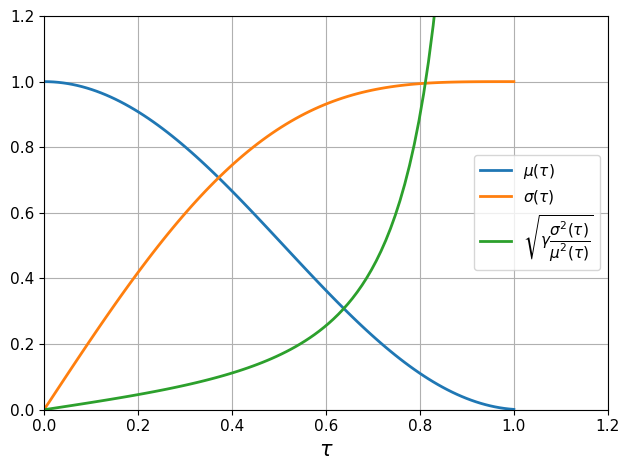

In [300]:
# Diffusion scheduling
eps = 1e-3
gam = 1e-2

def alpha(t):
    return torch.cos(math.acos(math.sqrt(eps))*t)**2

def mu(t):
    return alpha(t)

def sigma(t):
    return (1 - alpha(t)**2 + eps**2).sqrt()

def PLSvar(t):
    return gam*(sigma(t)**2)/(mu(t)**2)

t = torch.linspace(0,1,100)

plt.plot(t, mu(t), label = r'$\mu(\tau)$', linewidth = lw)
plt.plot(t, sigma(t), label = r'$\sigma(\tau)$', linewidth = lw)
plt.plot(t, PLSvar(t).sqrt(), label = r'$\sqrt{\gamma\dfrac{\sigma^2(\tau)}{\mu^2(\tau)}}$', linewidth = lw)
plt.ylim([0,1.2])
plt.xlim([0,1.2])
plt.xlabel(r'$\tau$', fontsize = axis_font)
plt.tick_params('both', labelsize = legend_font)
plt.grid()
plt.legend(fontsize = legend_font)
plt.tight_layout()
plt.savefig(impth+'scheduling.pdf')
plt.show()


tensor([[1., 0.],
        [0., 1.]])


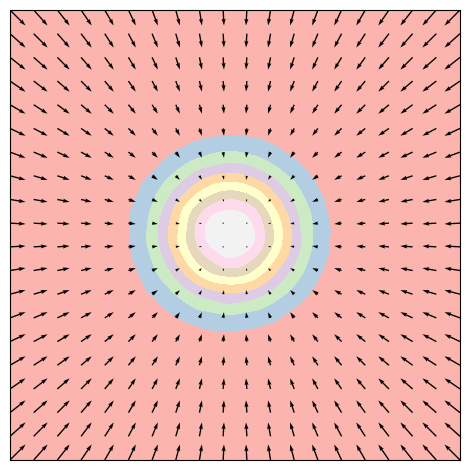

In [315]:
from torch.distributions import MultivariateNormal

sigm = torch.eye(2)
# sigm[0,1] = torch.rand(1)
# sigm[1,0] = torch.rand(1)

var = sigm@sigm.T
print(var)
dist = MultivariateNormal(torch.zeros(2), var)

s = dist.sample((2**20,))
h, _,_,_ = plt.hist2d(np.array(s[:,0]), np.array(s[:,1]), bins = 30)
plt.close()
plt.imshow(np.flip(h,1).T, interpolation = 'spline36', 
           extent = [-3*var[0,0],3*var[0,0],-3*var[1,1],3*var[1,1]],
           cmap = 'Pastel1')
x = torch.linspace(-3*var[0,0],3*var[0,0],20)
y = torch.linspace(-3*var[1,1],3*var[1,1],20)
a = plt.gca()
a.set_xticks(x)
a.set_yticks(y)
xy = torch.meshgrid(x,y,indexing = 'ij')

xyv = torch.cat([l.unsqueeze(0) for l in xy], dim = 0)
score = torch.linalg.inv(var)@((-xyv).reshape(2,-1))
score = score.reshape(2,20,20)
plt.quiver(xy[0], xy[1], score[0], score[1])
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.tight_layout()
plt.savefig(impth+'iso_score.pdf')
plt.show()
